<a href="https://colab.research.google.com/github/DaveStutler/G9/blob/master/TEAM_FRIENDSHIP_PARTICLES_WOOOOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot awkward
!pip install pandas


!pip install lumin uproot
!git clone https://github.com/SauceCat/PDPbox.git && cd PDPbox && pip install -e .

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/util

#Installs

## Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import sparse
from scipy.sparse import csr_matrix
#import uproot
# ^ we only need uproot if we are running the code from the very beginning
import pandas as pd
import numpy
import matplotlib.pyplot as plt

## Data Exploration

#All plots from linear

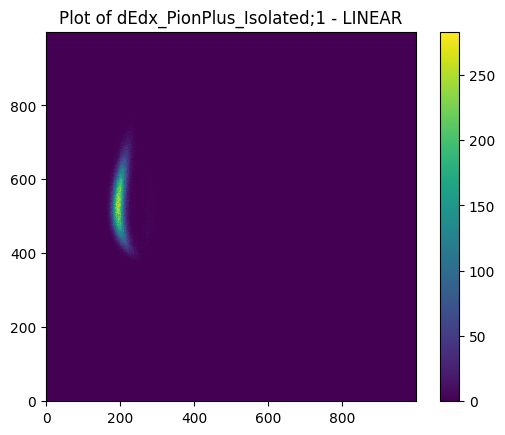

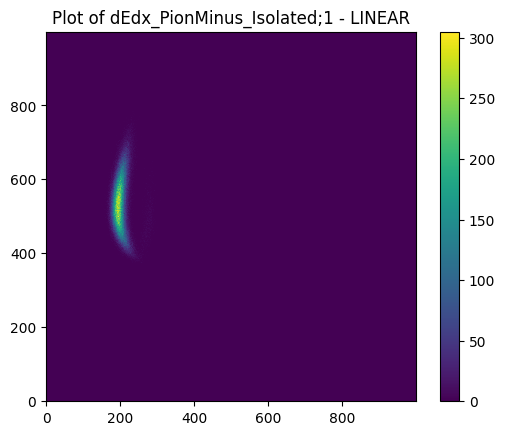

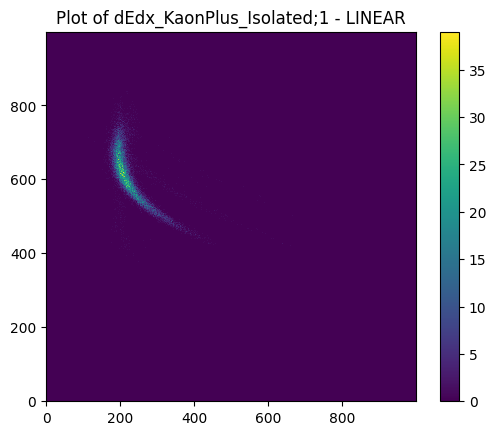

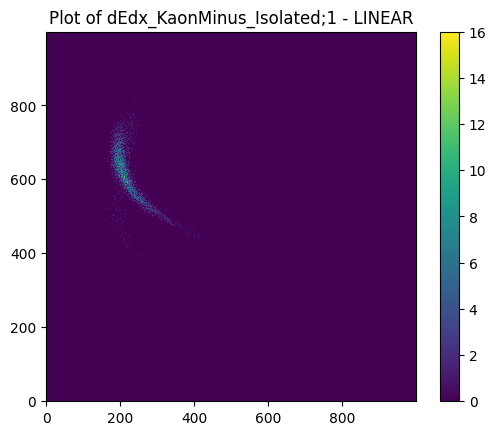

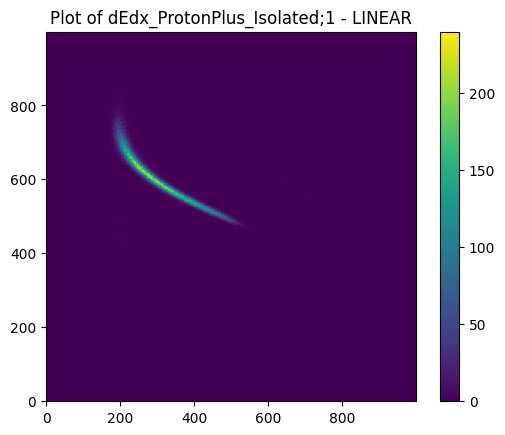

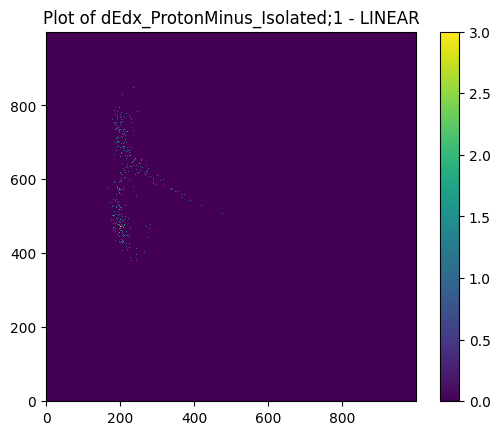

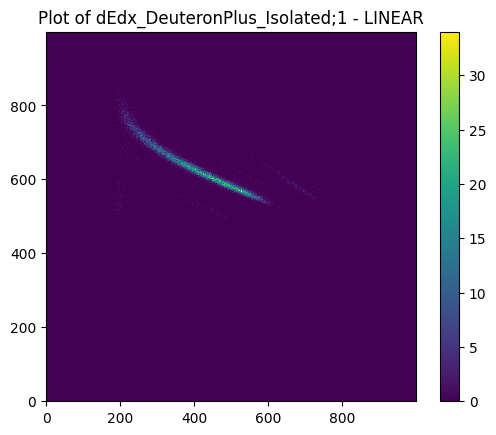

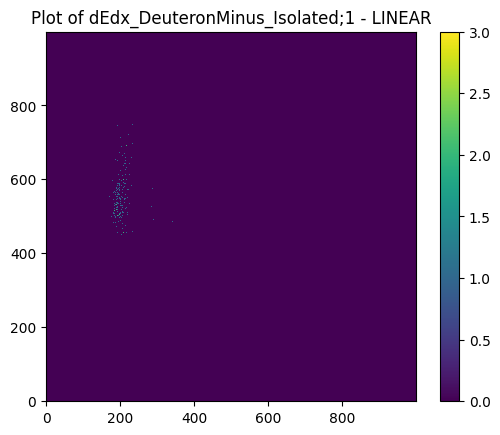

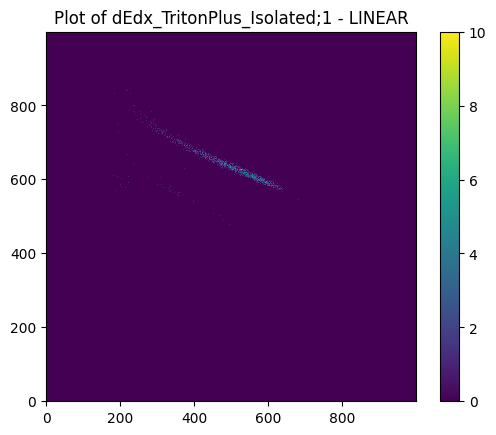

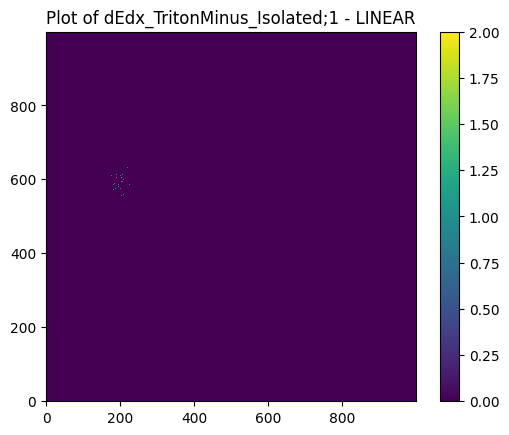

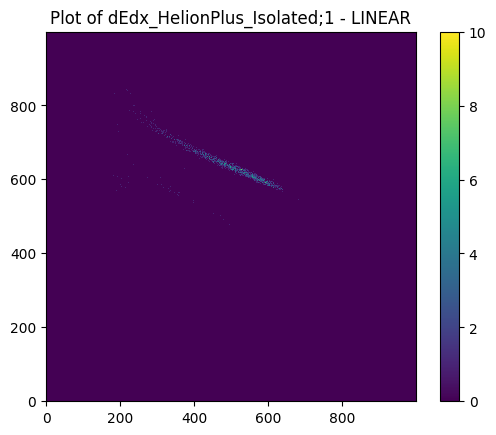

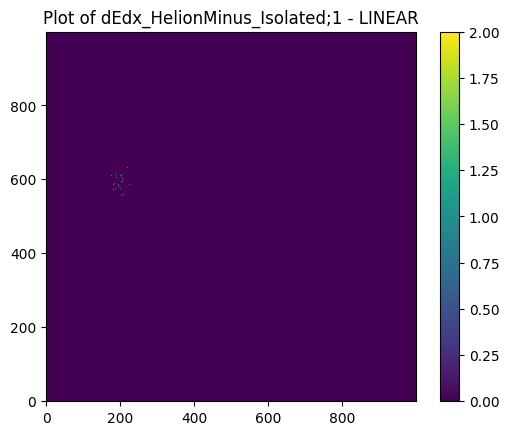

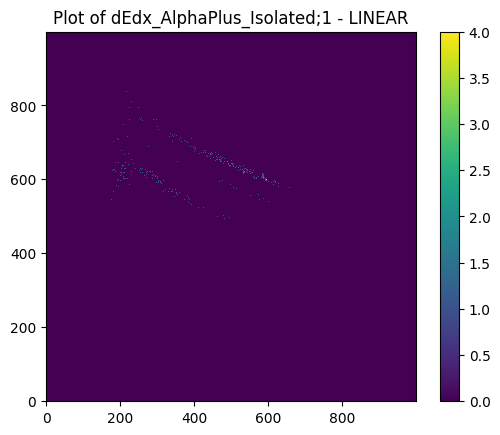

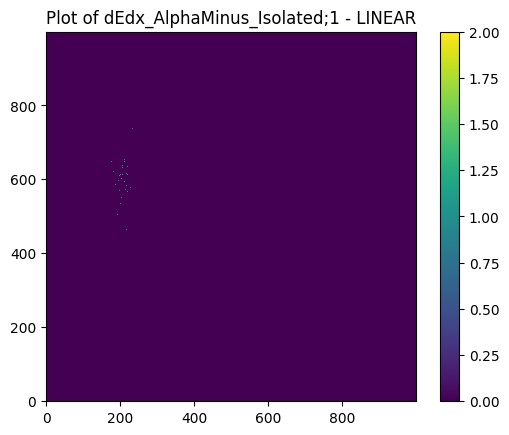

In [ ]:

root_file = uproot.open("/content/Output_File_2023_02_15.root")
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}


for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - LINEAR")
    plt.gca().invert_yaxis()
    plt.show()
linear_df = pd.DataFrame(mydict)
# one hot encoding
linear_df['linear'] = 1
linear_df['circular'] = 0

#All plots from circular data

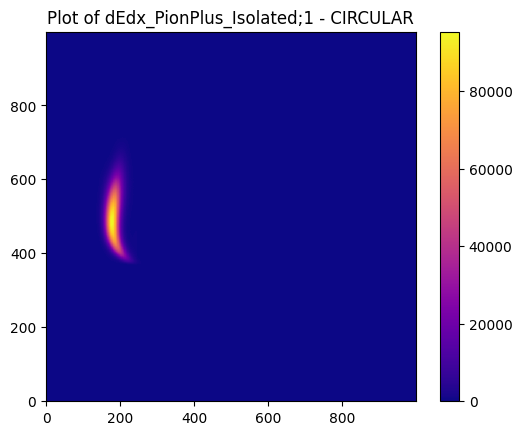

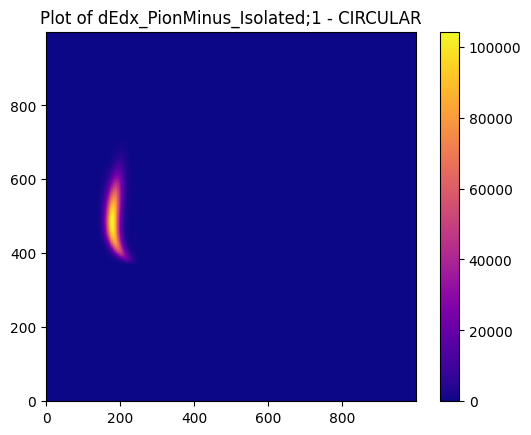

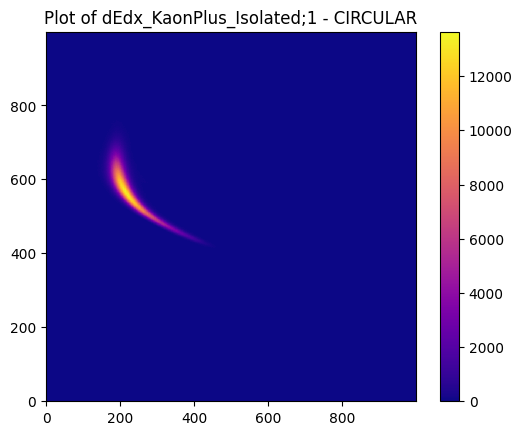

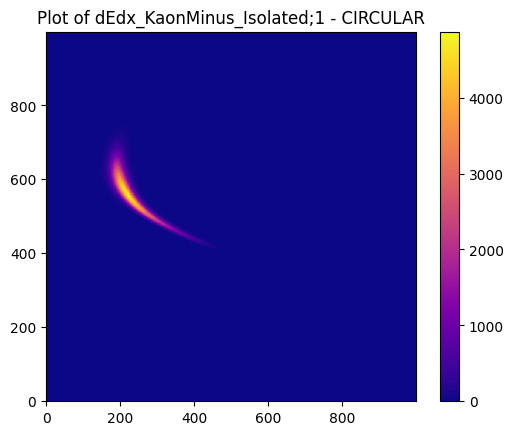

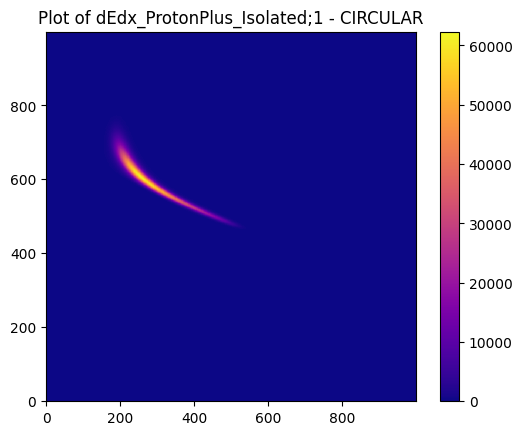

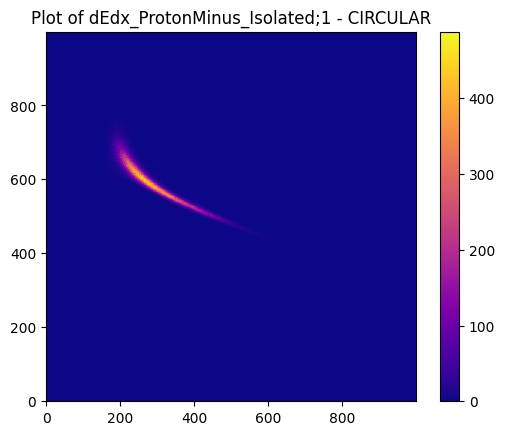

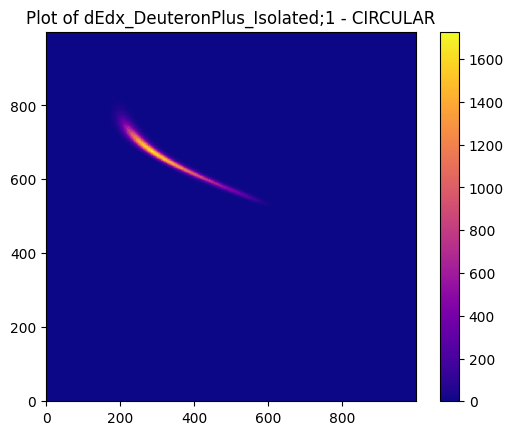

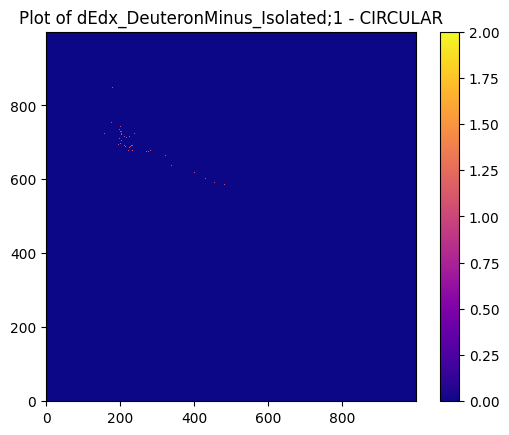

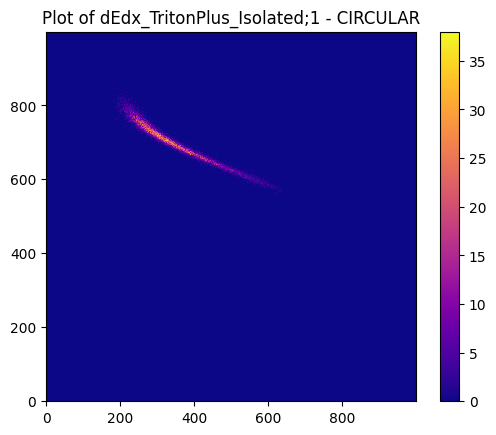

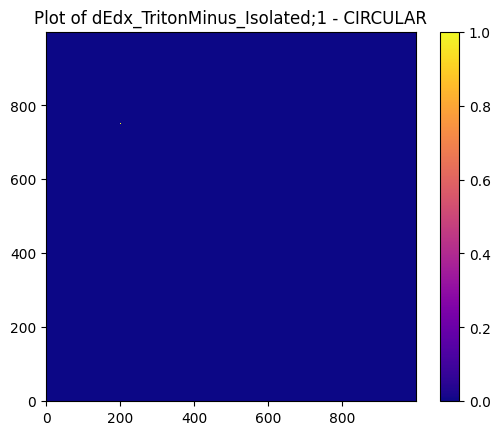

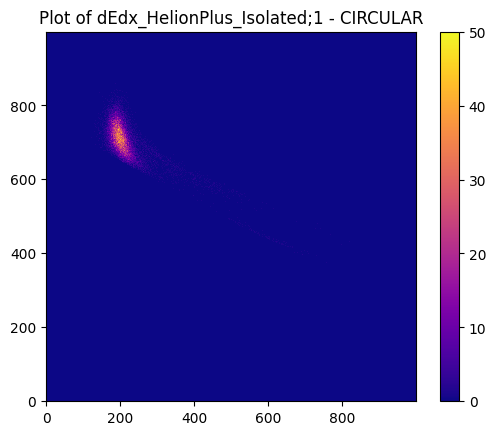

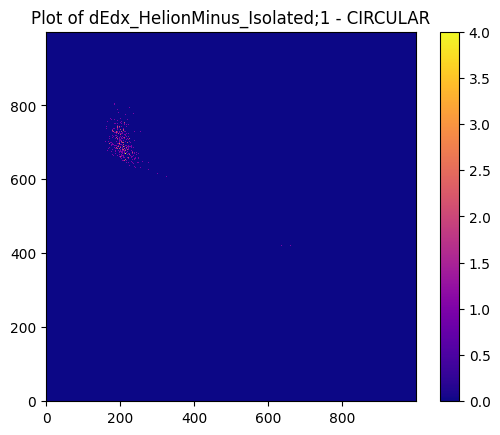

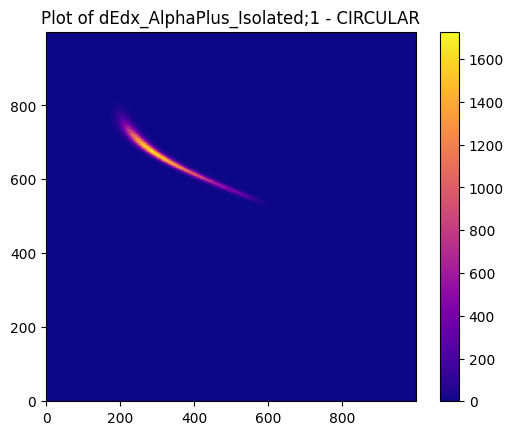

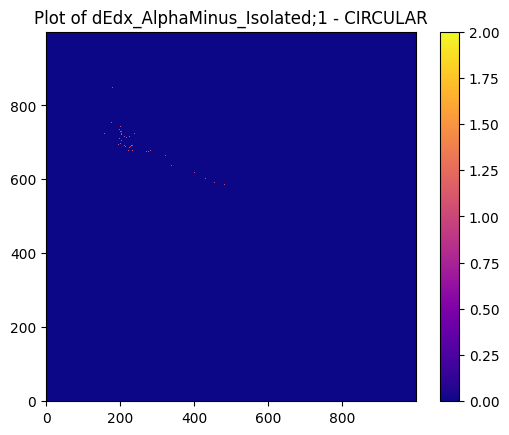

In [ ]:
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

root_file = uproot.open("/content/yieldHistos_7p7GeV_Pion_2022_08_31 (1).root")



tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}



for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - CIRCULAR")
    plt.gca().invert_yaxis()
    plt.show()
circular_df = pd.DataFrame(mydict)

# one hot encoding
circular_df['linear'] = 0
circular_df['circular'] = 1



In [ ]:
#testing to make sure plt.gca().invert_yaxis() wont mess up the data:
plt.subplot(1, 2, 1)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.grid(True)

plt.subplot(1, 2, 2)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# ok awesome looks good!

In [ ]:
combined_df = pd.concat([linear_df, circular_df], ignore_index=True)

combined_df


,dEdx_PionPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_AlphaPlus_Isolated;1,dEdx_AlphaMinus_Isolated;1,linear,circular
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1


In [ ]:
#GOAL = create a dataframe with 'position' (row), 'stopping power' (column), and then all the different features as seperate columns
#NOTE: you will be very confused if you dont understand this crucial obstacle that most of the code is combatting:
     #  most of the data is zeros, BUT THE NON ZERO ELEMENTS OCCUR IN DIFFERENT SPACES FOR ALL FEATURES
     #  thus if we selected only the non zero elements, we would not be able to conviently
     #match our elements based on row and column values in our dataframe, and thus our dataframe would not be helpful
     #  Thus we must find a range of data such that its likely that at least one feature will have a value at any point in this range
     # and then we will clean up our selection later


master = pd.DataFrame()
from scipy.sparse import find
# Heres the docs on how this function works:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.find.html


def local_min_max_finder(df, feature):
  #this function will find the minimum and maximum coordinate values of each matrix.
  # we are doing this so that all data points can be alligned with the minimum number of 0s
  # these local min and max values will be used to find the global min and max coordinates across all matrices so we know
  #the range of data that we need to include

  matrix0 = df[feature][0]
  #df[feature][0] will be the linear matrix for that feature

  matrix1 = df[feature][1]
  #df[feature][1] will be the circular matrix for that feature

  rows0, cols0, values0 = find(matrix0)
  # will find non zero values just so we can see the range of column and row indices

  rows0 = rows0.tolist()
  cols0 = cols0.tolist()


  rows1, cols1, values1 = find(matrix1)
  rows1 = rows1.tolist()
  cols1 = cols1.tolist()


  rows = rows0+rows1
  cols = cols0+cols1

  #will retrun the minimum row and maximum  row value where data is present
  #and minimum and maximum column value where data is present.
  #Note, these will likely not match up. For example, maybe the first row value occurs at (6,999) and the first column value
  #occurs at (9999, 2). Then we would output min row = 6 and min col 2 even if there is no data here.
  #we sacrific potentially having extra zeros in exchange for getting all the data and ensuring the data lines up

  return(min(rows), max(rows), min(cols), max(cols))

def global_min_max_finder(df):

  #uses local_min_max_finder to find the min and max row and column values for the whole dataset
  #why this is important:
  #.  allows us to delete a large amount of 0 space
  #.  ALLOWS ALL ROWS IN THE DATAFRAME

  minrows = []
  maxrows = []
  mincols = []
  maxcols = []
  for name in tree_names:
    a, b, c, d = local_min_max_finder(df, name)
    minrows.append(a)
    maxrows.append(b)
    mincols.append(c)
    maxcols.append(d)
  globalminrow = min(minrows)
  globalmaxrow = max(maxrows)
  globalmincol = min(mincols)
  globalmaxcol = max(maxcols)
  #returns the lowest and highest row and column values across all feature matrices

  return(globalminrow, globalmaxrow, globalmincol, globalmaxcol)



def value_getter(df, feature):
    # Uses the global max and min values to iterate through the inserted matrix and
    #find all the values in that range, include the ones where it is 0, because there could be data
    # here in another matrix so we must include it or else the dataframes will be of different sizes and we wont be able to merge
    minrow, maxrow, mincol, maxcol = global_min_max_finder(df)
    local = pd.DataFrame()
    #creates df

    matrix0 = df[feature][0]
    #will be linear matrix of feature

    matrix1 = df[feature][1]
    #will be circular matrix of feature

    values0 = []
    rows0 = []
    columns0 = []
    #these are for linbear too ^

    values1 = []
    rows1 = []
    columns1 = []
    #and these are for circular ^


    for row in range(minrow-1,maxrow+1):
      for column in range(mincol-1,maxcol+1):
        values0.append(matrix0[row, column])
        rows0.append(row)
        columns0.append(column)

        values1.append(matrix1[row, column])
        rows1.append(row)
        columns1.append(column)
        #getting a list of rows columns and the values at their intersections

    linear = ([1] * len(rows0)) + ([0]*len(rows1))
    circular = ([0] * len(rows0)) + ([1]*len(rows1))
    #so we can keep track of linear vs circular entries. Note: linear will be on top of list and circlar on bottom

    local['position'] = rows0 + rows1
    local['stopping power'] = columns0 + columns1
    local[feature] = values0 + values1
    local['linear'] = linear
    local['circular'] = circular
    #creates dataframe with all the linear values on top followed by ones on bottom

    return(local)
#print(value_getter(combined_df, tree_names[0]))
#print(value_getter(linear_df, tree_names[0]))

def recursive_merger(names, df, prev):
  #recursively calls the dataframe generator and merges dataframes together 2 at a time, connecting them by their
  #'position' (rows), 'stopping power' (columns), 'linear', and 'circular'values
  if len(names) == 0:

    return(prev)

  elif prev is None:
    prev = value_getter(df, names[0])

    return recursive_merger(names[1:], df, prev)
  else:
    current = value_getter(df, names[0])
    prev = pd.merge(current, prev, on=['position', 'stopping power', 'linear', 'circular'], how='inner')
    return recursive_merger(names[1:], df, prev)

master = recursive_merger(tree_names, combined_df, None)
print(type(master))
rows_to_drop = []
for index, row in master.iterrows():
    for column in tree_names:
        if all(row[column] == 0 for column in tree_names):
          rows_to_drop.append(index)
# this code sorts through the resulkting df to see if there are any banal rows where all features are 0 and deletes them.
# this baby takes awhile to run. For me about ~11. But we only need to run it once since we can save it as a csv


master.drop(rows_to_drop, inplace=True)
print(master)


<class 'pandas.core.frame.DataFrame'>
        position  stopping power  dEdx_AlphaMinus_Isolated;1  linear  \
4474         367             267                           0       1   
6137         369             234                           0       1   
6161         369             258                           0       1   
6171         369             268                           0       1   
6176         369             273                           0       1   
...          ...             ...                         ...     ...   
930395       898             172                           0       0   
931246       899             175                           0       0   
933794       902             179                           0       0   
938880       908             177                           0       0   
950774       922             199                           1       0   

        circular  dEdx_AlphaPlus_Isolated;1  dEdx_HelionMinus_Isolated;1  \
4474           0     

In [ ]:
#You do not need to run the code again cause I made a csv file

masterr = '/content/HolyGrail.csv'

master = pd.read_csv(masterr)

master.head()

,position,stopping power,dEdx_AlphaMinus_Isolated;1,linear,circular,dEdx_AlphaPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_PionPlus_Isolated;1
0,367,267,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,369,234,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,369,258,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,369,268,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,369,273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# reformating the csv file so that the columns are in the right order

ordered = list(master.columns[:3]) + list(master.columns[5:]) + list([master.columns[3]]) + list([master.columns[4]])
holygrail = master[ordered]
print(holygrail.head())
#!!!! NOTE: do NOT run the above line of code more than once in one session. Or else the ordering for master will be messed up again

   position  stopping power  dEdx_AlphaMinus_Isolated;1  \
0       367             267                           0   
1       369             234                           0   
2       369             258                           0   
3       369             268                           0   
4       369             273                           0   

   dEdx_AlphaPlus_Isolated;1  dEdx_HelionMinus_Isolated;1  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   dEdx_HelionPlus_Isolated;1  dEdx_TritonMinus_Isolated;1  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0 

In [ ]:
# incase we want to run the code only from the csv file, we will need these again
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']

In [ ]:
#NOTE: this code normalizes linear and circular elements seperately. See discord https://discord.com/channels/1139651953937358888/1139651954675568709/1146933407704690814
# for explaination



threshold = 0.05
# with threshold = .05, the accuracy is the same as with threshold = 0, but it runs a lot quicker
print(holygrail.columns)
print(tree_names)

linear_rows = holygrail[holygrail['linear'] == 1].copy()
circle_rows = holygrail[holygrail['circular'] == 1].copy()

for column in holygrail.columns:
    if column in ['linear', 'circular']:
        continue

    column_datal = linear_rows[column]
    maximl = column_datal.max()
    miniml = column_datal.min()
    linear_rows.loc[:, column] = np.where(
        (column_datal - miniml) / (maximl - miniml) > threshold,
        (column_datal - miniml) / (maximl - miniml),
        0)

    column_datac = circle_rows[column]
    maximc = column_datac.max()
    minimc = column_datac.min()
    circle_rows.loc[:, column] = np.where(
        (column_datac - minimc) / (maximc - minimc) > threshold,
        (column_datac - minimc) / (maximc - minimc),
        0)

#drops all columns where there is no data
holygrail = pd.concat([linear_rows, circle_rows], ignore_index=True)
rows_to_drop = []
for index, row in holygrail.iterrows():
    for column in tree_names:
        if all(row[column] == 0 for column in tree_names):
            rows_to_drop.append(index)
holygrail.drop(rows_to_drop, inplace=True)






Index(['position', 'stopping power', 'dEdx_AlphaMinus_Isolated;1',
       'dEdx_AlphaPlus_Isolated;1', 'dEdx_HelionMinus_Isolated;1',
       'dEdx_HelionPlus_Isolated;1', 'dEdx_TritonMinus_Isolated;1',
       'dEdx_TritonPlus_Isolated;1', 'dEdx_DeuteronMinus_Isolated;1',
       'dEdx_DeuteronPlus_Isolated;1', 'dEdx_ProtonMinus_Isolated;1',
       'dEdx_ProtonPlus_Isolated;1', 'dEdx_KaonMinus_Isolated;1',
       'dEdx_KaonPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1',
       'dEdx_PionPlus_Isolated;1', 'linear', 'circular'],
      dtype='object')
['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1', 'dEdx_KaonMinus_Isolated;1', 'dEdx_ProtonPlus_Isolated;1', 'dEdx_ProtonMinus_Isolated;1', 'dEdx_DeuteronPlus_Isolated;1', 'dEdx_DeuteronMinus_Isolated;1', 'dEdx_TritonPlus_Isolated;1', 'dEdx_TritonMinus_Isolated;1', 'dEdx_HelionPlus_Isolated;1', 'dEdx_HelionMinus_Isolated;1', 'dEdx_AlphaPlus_Isolated;1', 'dEdx_AlphaMinus_Isolated;1']


<ipython-input-44-43f654c7d19e>:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


In [ ]:
holygrail.to_csv('allnorm_holygrail.csv', index=False)

# NOTE: START HERE! WE ALREADY GENERATED THE CSV, SO THE CODE BEFORE THIS POINT (which generates the csv) IS NOT NEEDED

In [34]:
# START HERE

holygrail = '/content/allnorm_holygrail.csv'

holygrail = pd.read_csv(holygrail)

# DNN Binary Classification: Linear vs. Circular Collisions



In [35]:
# installations and imports

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers
from sklearn.model_selection import cross_val_score, cross_validate


## p-Value Analysis

In [ ]:
# to see how big the difference is between circular and linear:
import scipy.stats as stats


linear_rows = holygrail[holygrail['linear'] == 1].copy()
circle_rows = holygrail[holygrail['circular'] == 1].copy()


#t_tests

for column in linear_rows:
  if column in ['linear', 'circular']:
        continue

  tstat, p_val = stats.ttest_ind(linear_rows[column], circle_rows[column])
  print('FEATURE:',  column, "\n PVAL", p_val, "\n")



FEATURE: position 
 PVAL 0.9183335103639505 

FEATURE: stopping power 
 PVAL 0.0 

FEATURE: dEdx_AlphaMinus_Isolated;1 
 PVAL 0.13708020630009482 

FEATURE: dEdx_AlphaPlus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_HelionMinus_Isolated;1 
 PVAL 7.196809977467012e-242 

FEATURE: dEdx_HelionPlus_Isolated;1 
 PVAL 8.183389717077857e-281 

FEATURE: dEdx_TritonMinus_Isolated;1 
 PVAL 5.360874598830809e-13 

FEATURE: dEdx_TritonPlus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_DeuteronMinus_Isolated;1 
 PVAL 4.74143975315611e-78 

FEATURE: dEdx_DeuteronPlus_Isolated;1 
 PVAL 4.854587987970829e-07 

FEATURE: dEdx_ProtonMinus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_ProtonPlus_Isolated;1 
 PVAL 6.693100443195438e-53 

FEATURE: dEdx_KaonMinus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_KaonPlus_Isolated;1 
 PVAL 7.015866335721823e-78 

FEATURE: dEdx_PionMinus_Isolated;1 
 PVAL 1.518074709526015e-08 

FEATURE: dEdx_PionPlus_Isolated;1 
 PVAL 4.232848211659395e-14 



## Creating Model then Training and Testing

Epoch 1/10
3232/3232 [==============================] - 21s 6ms/step - loss: 0.1620 - accuracy: 0.9298
Epoch 2/10
3232/3232 [==============================] - 8s 3ms/step - loss: 0.0562 - accuracy: 0.9769
Epoch 3/10
3232/3232 [==============================] - 12s 4ms/step - loss: 0.0485 - accuracy: 0.9787
Epoch 4/10
3232/3232 [==============================] - 8s 3ms/step - loss: 0.0455 - accuracy: 0.9808
Epoch 5/10
3232/3232 [==============================] - 7s 2ms/step - loss: 0.0427 - accuracy: 0.9814
Epoch 6/10
3232/3232 [==============================] - 13s 4ms/step - loss: 0.0402 - accuracy: 0.9832
Epoch 7/10
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0406 - accuracy: 0.9832
Epoch 8/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0390 - accuracy: 0.9834
Epoch 9/10
3232/3232 [==============================] - 8s 3ms/step - loss: 0.0371 - accuracy: 0.9845
Epoch 10/10
360/360 [==============================] - 1s 1ms/step
MSE is: 0.00

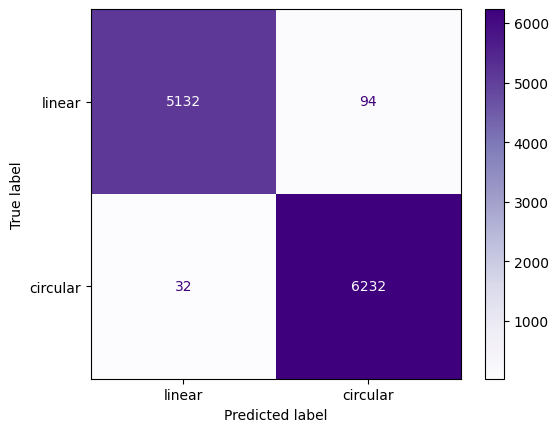

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
#print(holygrail.head())
target_columns = ['linear', 'circular']
other_columns = holygrail.columns[:-2]
X_train, X_test, y_train, y_test = train_test_split(holygrail.drop(columns = target_columns, axis=1), holygrail[target_columns], test_size=0.1, random_state=20)

classifier = Sequential()

classifier.add(Dense(units = len(other_columns), activation = 'ReLU', input_dim = len(other_columns)))

classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))


classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 10)

yhat_test = classifier.predict(X_test.astype(float))
yhat_test

yhat_binary = (yhat_test == yhat_test.max(axis=1, keepdims=True)).astype(int)

y_test_values = y_test.values

accuracy = accuracy_score(y_test, yhat_binary)

mse = mean_squared_error(y_test, yhat_test)

print("MSE is:", mse, '\nAcuuracy is:', accuracy)

print(classification_report(y_test_values.argmax(axis=1),yhat_binary.argmax(axis=1),target_names=target_columns,digits=2))

matrixim = confusion_matrix(y_test_values.argmax(axis=1), yhat_binary.argmax(axis=1))
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=matrixim, display_labels=target_columns)
mycmdisp.plot(cmap=plt.cm.Purples, values_format='d')




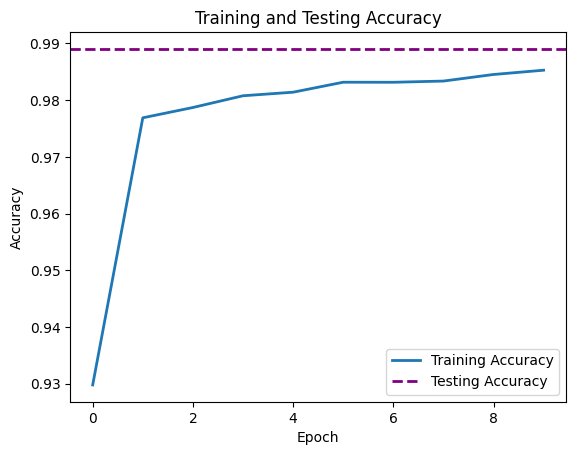

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.axhline(y=accuracy, label='Testing Accuracy', linestyle='--', color = 'purple', linewidth=2)
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this graph is our anwser to #4 on the assignment description. It shows our fitting graph showing how the training accuracy relates to testing accuracy.
# Our testing accuracy is higher than training accuracy, which is weird. But at least it doesn't indicate clear signs of under fitting and overfitting. We think the model
# was able to learn the data so quickly due to the large dataframe size of 115,000 rows and the fact that the p_values indicated very strong differences between
# the data from the 2 classes it was classifying

## k-Fold Cross Validation

In [ ]:
# To be used to create instances of a DNN Model with the following architecture.
def Create_DNN_Model():
  classifier = Sequential() # Initialising the DNN.

  classifier.add(Dense(units = len(other_columns), activation = 'ReLU', input_dim = len(other_columns))) # 1st hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 2nd hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 3rd hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 4th hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 5th hidden layer.
  classifier.add(Dense(units = 2, activation = 'sigmoid'))                                               # Output layer.

  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compiling DNN.

  return classifier

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=20) # k-Fold cross-validation split.

# Array of scores of the estimator for each run of the cross validation.
estimator = KerasClassifier(build_fn=Create_DNN_Model, epochs=10, batch_size=32)
scores = cross_val_score(estimator, X_train, y_train, cv = kfolds)





<ipython-input-14-5995e5853d53>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=Create_DNN_Model, epochs=10, batch_size=32)


Epoch 1/10
2909/2909 [==============================] - 9s 3ms/step - loss: 0.1662 - accuracy: 0.9331
Epoch 2/10
2909/2909 [==============================] - 8s 3ms/step - loss: 0.0594 - accuracy: 0.9754
Epoch 3/10
2909/2909 [==============================] - 7s 2ms/step - loss: 0.0519 - accuracy: 0.9781
Epoch 4/10
2909/2909 [==============================] - 8s 3ms/step - loss: 0.0476 - accuracy: 0.9796
Epoch 5/10
2909/2909 [==============================] - 7s 2ms/step - loss: 0.0458 - accuracy: 0.9804
Epoch 6/10
2909/2909 [==============================] - 8s 3ms/step - loss: 0.0430 - accuracy: 0.9814
Epoch 7/10
2909/2909 [==============================] - 8s 3ms/step - loss: 0.0418 - accuracy: 0.9818
Epoch 8/10
2909/2909 [==============================] - 7s 3ms/step - loss: 0.0398 - accuracy: 0.9827
Epoch 9/10
2909/2909 [==============================] - 8s 3ms/step - loss: 0.0374 - accuracy: 0.9838
Epoch 10/10
324/324 [==============================] - 2s 3ms/step - loss: 0.0532 

In [ ]:
scores

array([0.9766947 , 0.97891885, 0.97969246, 0.98027271, 0.98443091,
       0.98607486, 0.98123974, 0.98046422, 0.97901356, 0.98491293])

In [ ]:
# Report performance.
print('\nOverall Average Accuracy: %.3f (%.3f)\n' % (scores.mean(), scores.std()))

for idx, score in enumerate(scores):
    print("Fold {} Accuracy: {}".format(idx+1, str(round(score, 3))))

print('BEST FOLD = {}'.format(np.argmax(scores) + 1))


Overall Average Accuracy: 0.981 (0.003)

Fold 1 Accuracy: 0.977
Fold 2 Accuracy: 0.979
Fold 3 Accuracy: 0.98
Fold 4 Accuracy: 0.98
Fold 5 Accuracy: 0.984
Fold 6 Accuracy: 0.986
Fold 7 Accuracy: 0.981
Fold 8 Accuracy: 0.98
Fold 9 Accuracy: 0.979
Fold 10 Accuracy: 0.985
BEST FOLD = 6


# DNN Linear Regression: Predicting the Stopping Power and Position that a Particle Will Collide At


<Axes: >

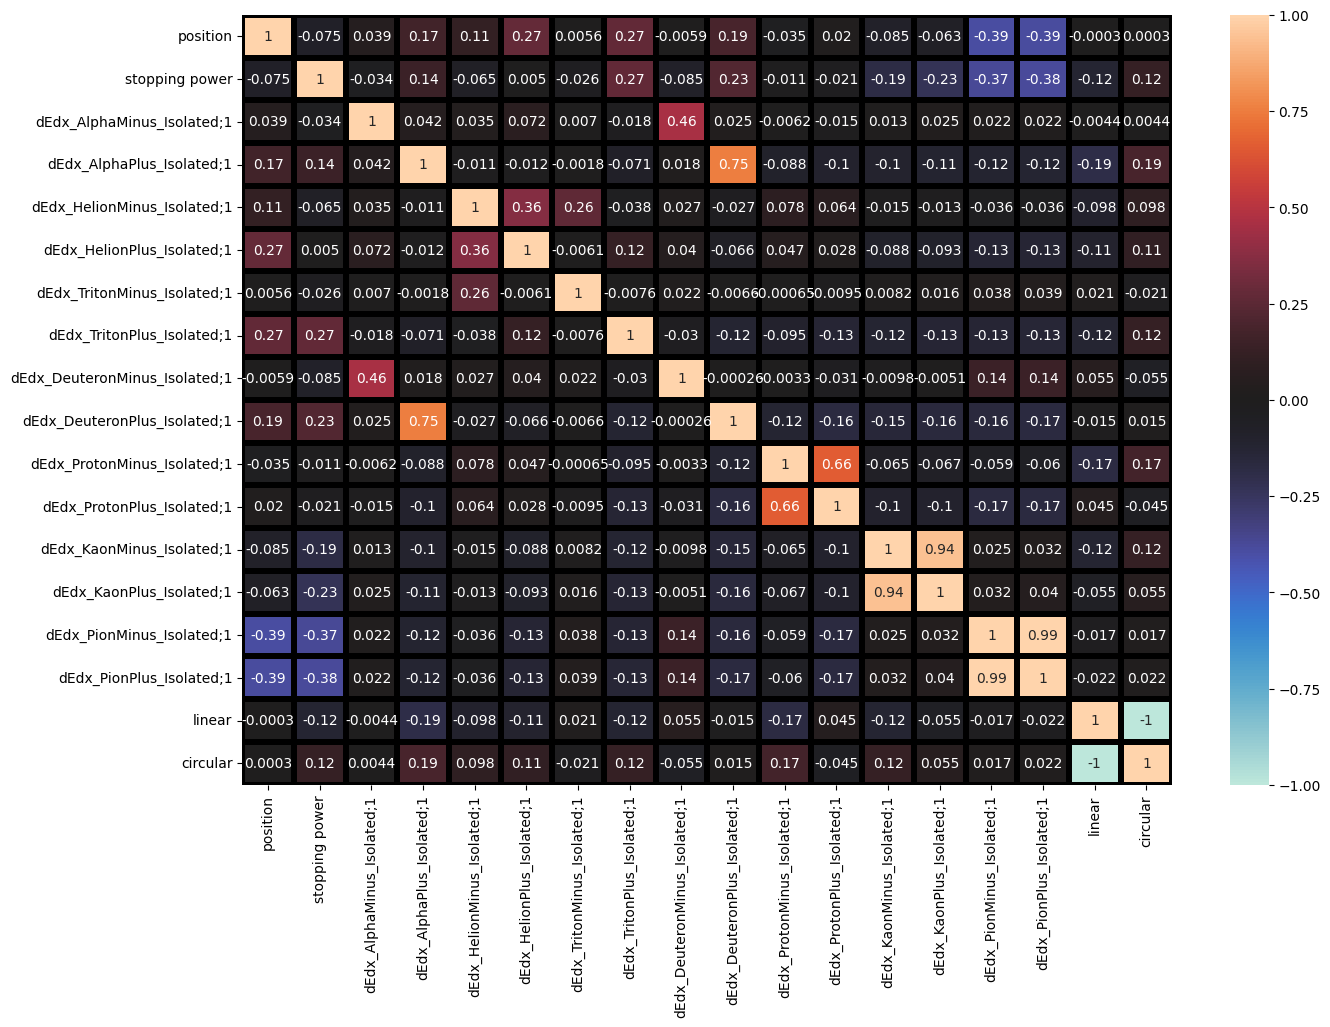

In [ ]:
# Just a heatmap for shits and giggles :P
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(holygrail.corr(), annot = True, vmin = -1, vmax = 1, center = 0, linewidth= 3, linecolor = 'black', )

## Creating Model then Training and Testing

In [ ]:
# note, the way the dataframe is formatting is by saying the count of each particle that collided at that stopping power and position
# we want to use this to determine the likelihood that given a certain stopping power and position, a particule will collide there
from keras.metrics import RootMeanSquaredError
import tensorflow.keras.backend as K
from keras.utils import get_custom_objects

target_columns = holygrail.columns[:2]
other_columns = holygrail.columns[2:]

def r2(test, pred):
    r2 = 1 - tf.reduce_sum(tf.square(test - pred)) / tf.reduce_sum(tf.square(test - tf.reduce_mean(test)))
    return r2
# tensor flow is self absorbed and only likes to it when you use its functions and no one elses

get_custom_objects().update({'R2': r2})

X_train, X_test, y_train, y_test = train_test_split(holygrail.drop(columns = target_columns, axis=1), holygrail[target_columns], test_size=0.1, random_state=20)


classifier = Sequential()

classifier.add(Dense(units = len(other_columns), activation = 'linear', input_dim = len(other_columns)))

classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 12, activation = 'linear'))
classifier.add(Dense(units = 2, activation = 'linear'))


classifier.compile(loss='MSE', optimizer='adam', metrics=['MSE', 'R2'])


history = classifier.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = False)

yhat_test = classifier.predict(X_test.astype(float))




y_test_values = y_test.values



mse = mean_squared_error(y_test_values, yhat_test)
r2_val = r2(y_test_values, yhat_test)
print("MSE is:", mse, "\nR^2 is:", r2_val.numpy())




360/360 [==============================] - 1s 1ms/step
MSE is: 0.01772358752308062 
R^2 is: 0.4205521478833796


## k-Fold Cross Validation

In [ ]:
# To be used to create instances of a DNN Model with the following architecture.
def Create_DNN_Model():
  classifier = Sequential() # Initialising the DNN.

  classifier.add(Dense(units = len(other_columns), activation = 'linear', input_dim = len(other_columns))) # input layer.

  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 2nd hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 3rd hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 4th hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 5th hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 6th hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 7th hidden layer.
  classifier.add(Dense(units = 12, activation = 'linear'))                                                 # 8th hidden layer.
  classifier.add(Dense(units = 2, activation = 'linear'))                                                  # Output layer.

  classifier.compile(loss='MSE', optimizer='adam', metrics=['MSE', 'R2']) # Compiling DNN.

  return classifier

In [ ]:
kfolds = KFold(n_splits=4, shuffle=True, random_state=20) # k-Fold cross-validation split.

r2_scores = []
mse_scores = []

#I think this isnt working because X_train and y_train are df and not values. I was getting this error on hw2

X_train_lst = X_train.values
y_train_lst = y_train.values
X_test_lst = X_test.values
for fold, (train_index, val_index) in enumerate(kfolds.split(X_train)):
    # Partitioning the training and validation data for this fold.
    X_train_fold, y_train_fold = X_train_lst[train_index], y_train_lst[train_index]
    X_val_fold, y_val_fold = X_train_lst[val_index], y_train_lst[val_index]

    # Creating instance of model.
    model = Create_DNN_Model()

    # Training model.
    history = model.fit(X_train_fold, y_train_fold, batch_size = 50, epochs = 100)

    # Predictions.
    yhat_test = classifier.predict(X_val_fold.astype(float))

    # Calculating MSE, R2 values.
    # the R2 function spits out values as EagleTensor data types. Thats why we do numpy() to make it into a normal dtype
    mse_val = mean_squared_error(y_val_fold, yhat_test)
    r2_val = r2(y_val_fold, yhat_test)

    mse_scores.append(round(mse_val, 3))
    r2_scores.append(round(r2_val.numpy(), 3))


Epoch 1/100
1552/1552 [==============================] - 5s 2ms/step - loss: 0.0200 - MSE: 0.0200 - R2: 0.3394
Epoch 2/100
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0181 - MSE: 0.0181 - R2: 0.4031
Epoch 3/100
1552/1552 [==============================] - 4s 3ms/step - loss: 0.0181 - MSE: 0.0181 - R2: 0.4052
Epoch 4/100
1552/1552 [==============================] - 6s 4ms/step - loss: 0.0180 - MSE: 0.0180 - R2: 0.4057
Epoch 5/100
1552/1552 [==============================] - 8s 5ms/step - loss: 0.0180 - MSE: 0.0180 - R2: 0.4066
Epoch 6/100
1552/1552 [==============================] - 7s 5ms/step - loss: 0.0180 - MSE: 0.0180 - R2: 0.4058
Epoch 7/100
1552/1552 [==============================] - 7s 5ms/step - loss: 0.0180 - MSE: 0.0180 - R2: 0.4077
Epoch 8/100
1552/1552 [==============================] - 7s 4ms/step - loss: 0.0180 - MSE: 0.0180 - R2: 0.4078
Epoch 9/100
1552/1552 [==============================] - 11s 7ms/step - loss: 0.0179 - MSE: 0.0179 - R2: 0.4089


In [ ]:
mse_scores

[0.018, 0.018, 0.018, 0.018]

In [ ]:
r2_scores

[0.416, 0.415, 0.413, 0.413]

In [ ]:
mse_scores = numpy.array(mse_scores) # Converting to numpy arrays.
r2_scores = numpy.array(r2_scores)

# Report performance.
print('\nOverall Average MSE: %.3f (%.3f)' % (mse_scores.mean(), mse_scores.std()))
print('Overall Average R2: %.3f (%.3f)\n' % (r2_scores.mean(), r2_scores.std()))

for idx, score in enumerate(mse_scores):
    print("Fold {} MSE: {}".format(idx+1, str(round(score, 3))))

print('BEST MSE FOLD = {}\n'.format(np.argmax(mse_scores) + 1))

for idx, score in enumerate(r2_scores):
    print("Fold {} R2: {}".format(idx+1, str(round(score, 3))))

print('BEST R2 FOLD = {}'.format(np.argmax(r2_scores) + 1))


Overall Average MSE: 0.018 (0.000)
Overall Average R2: 0.414 (0.001)

Fold 1 MSE: 0.018
Fold 2 MSE: 0.018
Fold 3 MSE: 0.018
Fold 4 MSE: 0.018
BEST MSE FOLD = 1

Fold 1 R2: 0.416
Fold 2 R2: 0.415
Fold 3 R2: 0.413
Fold 4 R2: 0.413
BEST R2 FOLD = 1
